In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from scipy.optimize import curve_fit

In [2]:
pop = pd.read_csv('GDP and population/canada_population.txt')
GDP = pd.read_csv('GDP and population/canada_gdp.csv')

In [3]:
pop = pop[['Year','Population']]

In [4]:
GDP=GDP.rename(columns={'MKTGDPCAA646NWDB':'GDP'})
GDP=GDP.rename(columns={'DATE':'Year'})

#converting year format to datetime64 for delete month and day, you can check the format with dataframe.info()
GDP['Year'] = pd.to_datetime(GDP['Year'] )
GDP['Year'] = GDP['Year'].dt.strftime('%Y')

# format changing doesn allow us to merge , so we have to conver date format to int
GDP['Year']=GDP['Year'].astype(int)

In [5]:
pop_gdp = pd.merge(GDP,pop)

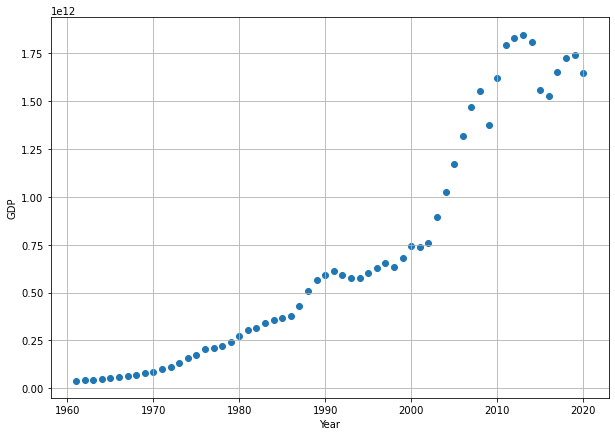

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(pop_gdp.Year,pop_gdp.GDP)
plt.grid()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

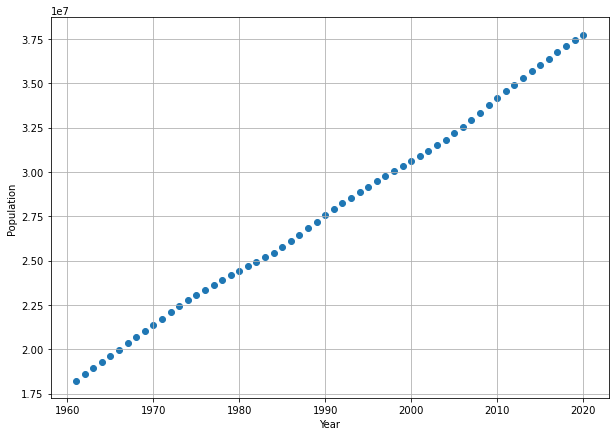

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(pop_gdp.Year ,pop_gdp.Population)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

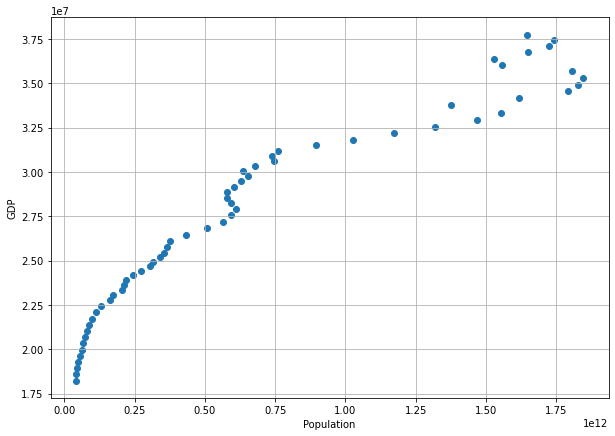

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(pop_gdp.GDP,pop_gdp.Population )
plt.grid()
plt.ylabel('GDP')
plt.xlabel('Population')
plt.show()

In [9]:
pop_gdp.corr()

,Year,GDP,Population
Year,1.000000,0.945201,0.999227
GDP,0.945201,1.000000,0.951043
Population,0.999227,0.951043,1.000000


####  Data Normalization 

In [12]:
X_temp = pop_gdp[['GDP']]
X_n = preprocessing.StandardScaler().fit(X_temp).transform(X_temp)
X = pd.DataFrame(X_n, columns = ['GDP'])

#### Separating train data and test data

In [13]:
y = pop_gdp[['Population']]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [14]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[5215657.78649649]]
Intercept:  [27764661.14910048]


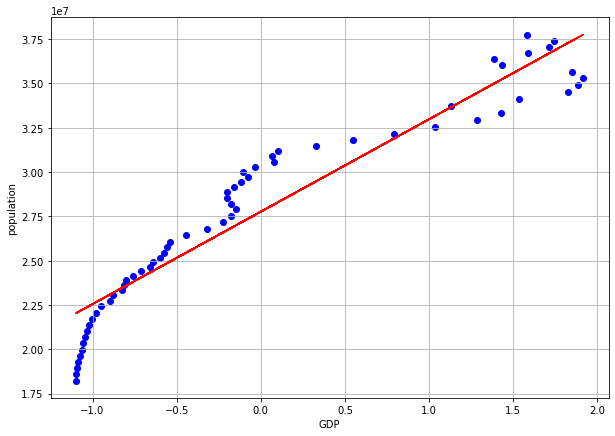

In [29]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y,  color='blue')
plt.plot(X_train, regr.coef_[0][0]*X_train + regr.intercept_[0], '-r')
plt.xlabel("GDP")
plt.ylabel("population")
plt.grid()
plt.show()

In [16]:
test_y_ = regr.predict(X_test)

print("R2-score: %.2f" % r2_score(y_test , test_y_) )

R2-score: 0.91


#### Trying new way to generate a model

In [17]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

In [18]:
regrp = linear_model.LinearRegression()
y_train_ = regrp.fit(X_poly, y_train)

print ('Coefficients: ', regrp.coef_)
print ('Intercept: ',regrp.intercept_)

Coefficients:  [[       0.          6654252.13786506 -1948167.38847627]]
Intercept:  [29737435.54714651]


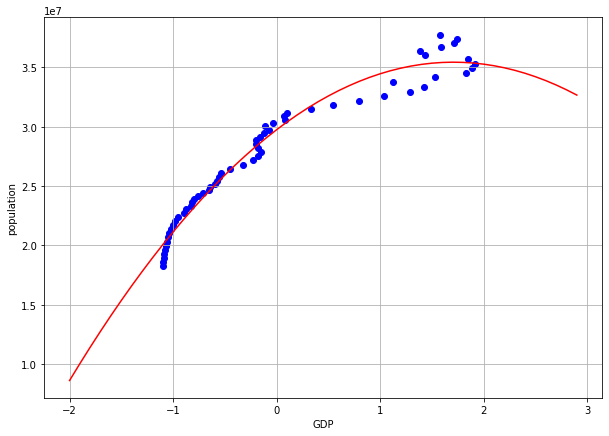

In [19]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y,  color='blue')
XX = np.arange(-2 , 3 , 0.1)
yy = regrp.intercept_[0]+ regrp.coef_[0][1]*XX+ regrp.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.grid()
plt.xlabel("GDP")
plt.ylabel("population")
plt.show()

In [20]:
X_poly_test = poly.fit_transform(X_test) # we have a problem here , 10 has been changeing 
test_y_p = regrp.predict(X_poly_test)
print("R2-score: %.2f" % r2_score(y_test,test_y_p ))

R2-score: 0.98


#####  Try sigmoid function.

In [31]:
#def sigmoid(x, a , b , c):
#    y =((( -(a*np.exp((-b)*x)) )) + c)
#    return y

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

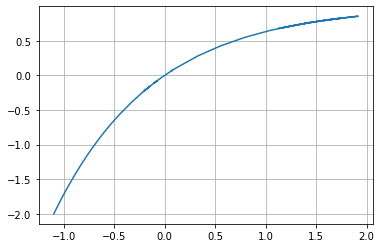

In [32]:
a =1
b =1
c =1
# I guessed this value with this  https://www.desmos.com/calculator/auubsajefh

Y_pred = sigmoid( X , a , b , c)

plt.plot(X, Y_pred)
plt.grid()

In [33]:
xdata = np.asanyarray(X_train)
ydata = np.asanyarray(y_train)

popt, pcov = curve_fit(sigmoid, xdata.reshape(-1,) , ydata.reshape(-1,) , maxfev=100000) 

print(" a = %f, b = %f c = %f"% (popt[0], popt[1] , popt[2]))

 a = -99955647131.320206, b = -0.000052 c = -99927882595.629059


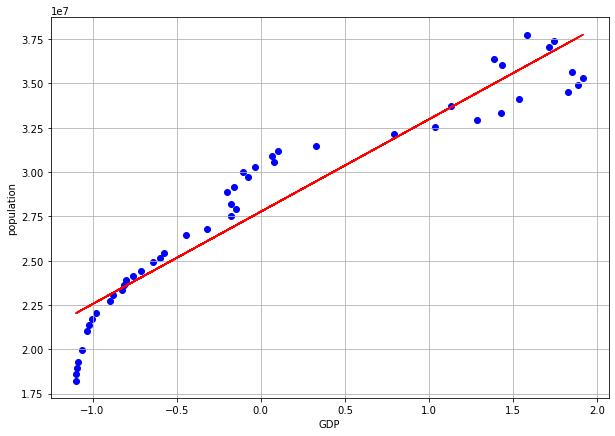

In [34]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train,  color='blue')
plt.plot(xdata , sigmoid(xdata ,popt[0],popt[1] ,popt[2]) , color='red')
plt.grid()
plt.xlabel("GDP")
plt.ylabel("population")
plt.show()

In [25]:
test_y_s = sigmoid(X_test ,popt[0],popt[1] ,popt[2])
print("R2-score: %.2f" % r2_score(y_test,test_y_s ) )  # I find out sigmoid ist good idea

R2-score: 0.91
